# Vehicle register ingestion

In [105]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_columns = 50

filepath = './data/nosync/registr_silnicnich_vozidel_2023-02-24.csv'

# Prepare the processing pipeline
pipeline = []


## Load data from XML

In [133]:
cols = [
    'Rok výroby',
    'Stav',
    '1. registrace',
    '1. registrace ČR',
    'Druh',
    'Druh 2. ř.',
    'Kategorie',
    'Tovární značka',
    'Varianta název',
    'Obchodní označení',
    'VIN',
    'Motor/Max. výkon',
    'Motor/Zdvihový objem',
    'Palivo',
    'Míst celkem',
    'Barva',
    'Rozvor',
    'Délka',
    'Šířka',
    'Výška',
    'Provozní hmotnost',
    'Přípustná hmotnost',
    'Spojovací zařízení (SZ)',
    'Přípustná SZ brzděného',
    'Přípustná SZ nebrzděného',
    'Nápravy počet',
    'Pneumatiky N1',
    'Pneumatiky N1',
    'Pneumatiky N3',
    'Pneumatiky N4',
    'Ráfky N1',
    'Ráfky N1',
    'Ráfky N3',
    'Ráfky N4',
    'Max. rychlost',
    'Spotřeba průměrná',
    'Spotřeba město',
    'Spotřeba mimo město',
    'Převodovka',
    'Emise CO2',
    'Emise CO2/město',
    'Emise CO2/mimo město',
    'Prohlídka status',
]

dtype = {
    'Rok výroby': 'float16',  # 'Rok výroby',
    'Stav': 'category',  # 'Stav',
    '1. registrace': 'object',  # '1. registrace',
    '1. registrace ČR': 'object',  # '1. registrace ČR',
    'Druh': 'category',  # 'Druh',
    'Druh 2. ř.': 'category',  # 'Druh 2. ř.',
    'Kategorie': 'category',  # 'Kategorie',
    'Tovární značka': 'category',  # 'Tovární značka',
    'Varianta název': 'category',  # 'Varianta název',
    'Obchodní označení': 'category', # 'Obchodní označení',
    'VIN': 'object', # 'VIN',
    'Motor/Max. výkon': 'float16', # 'Motor/Max. výkon',
    'Motor/Zdvihový objem': 'float16', # 'Motor/Zdvihový objem',
    'Palivo': 'category', # 'Palivo',
    'Míst celkem': 'category', # 'Míst celkem',
    'Barva': 'category', # 'Barva',
    'Rozvor': 'category', # 'Rozvor',
    'Délka': 'float16', # 'Délka',
    'Šířka': 'float16', # 'Šířka',
    'Výška': 'float16', # 'Výška',
    'Provozní hmotnost': 'float16', # 'Provozní hmotnost',
    'Přípustná hmotnost': 'float16', # 'Přípustná hmotnost',
    'Spojovací zařízení (SZ)': 'object', # 'Spojovací zařízení (SZ)',
    'Přípustná SZ brzděného': 'float16', # 'Přípustná SZ brzděného',
    'Přípustná SZ nebrzděného': 'float16', # 'Přípustná SZ nebrzděného',
    'Nápravy počet': 'float16', # 'Nápravy počet',
    'Pneumatiky N1': 'category', # 'Pneumatiky N1',
    'Pneumatiky N1': 'category', # 'Pneumatiky N1',
    'Pneumatiky N3': 'category', # 'Pneumatiky N3',
    'Pneumatiky N4': 'category', # 'Pneumatiky N4',
    'Ráfky N1': 'category', # 'Ráfky N1',
    'Ráfky N1': 'category', # 'Ráfky N1',
    'Ráfky N3': 'category', # 'Ráfky N3',
    'Ráfky N4': 'category', # 'Ráfky N4',
    'Max. rychlost': 'float16', # 'Max. rychlost',
    'Spotřeba průměrná': 'float16', # 'Spotřeba průměrná',
    'Spotřeba město': 'float16', # 'Spotřeba město',
    'Spotřeba mimo město': 'float16', # 'Spotřeba mimo město',
    'Převodovka': 'category', # 'Převodovka',
    'Emise CO2': 'float16', # 'Emise CO2',
    'Emise CO2/město': 'float16', # 'Emise CO2/město',
    'Emise CO2/mimo město': 'float16', # 'Emise CO2/mimo město',
    'Prohlídka status': 'category', # 'Prohlídka status',
}

dataf = pd.read_csv(filepath, usecols=cols, sep='|', dtype=dtype, true_values=['True'], false_values=['False'], na_values=['', 'NEUVEDENO'], thousands=' ', decimal=',', encoding='cp1250', encoding_errors='ignore')

In [23]:
data = dataf.sample(frac=0.1, random_state=1643515)

### Columns

In [107]:
def rename_cols(df: pd.DataFrame):
    return df.rename(columns={
        'Rok výroby': 'ManufactureYear',
        'Stav': 'State',
        '1. registrace': 'FirstRegistration',
        '1. registrace ČR': 'FirstRegistrationCZ',
        'Druh': 'Type',
        'Druh 2. ř.': 'SecondaryType',
        'Kategorie': 'Category',
        'Tovární značka': 'Make',
        'Varianta název': 'ModelSecondary',
        'Obchodní označení': 'Model',
        'VIN': 'VIN',
        'Motor/Max. výkon': 'MotorPower',
        'Motor/Zdvihový objem': 'MotorVolume',
        'Palivo': 'DriveType',
        'Míst celkem': 'Places',
        'Barva': 'Color',
        'Rozvor': 'WheelbaseSize',
        'Délka': 'Length',
        'Šířka': 'Width',
        'Výška': 'Height',
        'Provozní hmotnost': 'OperatingWeight',
        'Přípustná hmotnost': 'PermissibleWeight',
        'Spojovací zařízení (SZ)': 'ConnectingDevice',
        'Přípustná SZ brzděného': 'PermissibleWeightBrakedTrailer',
        'Přípustná SZ nebrzděného': 'PermissibleWeightUnbrakedTrailer',
        'Nápravy počet': 'AxlesCount',
        'Pneumatiky N1': 'TyresN1',
        'Pneumatiky N1': 'TyresN2',
        'Pneumatiky N3': 'TyresN3',
        'Pneumatiky N4': 'TyresN4',
        'Ráfky N1': 'RimsN1',
        'Ráfky N1': 'RimsN2',
        'Ráfky N3': 'RimsN3',
        'Ráfky N4': 'RimsN4',
        'Max. rychlost': 'MaxSpeed',
        'Spotřeba průměrná': 'AverageConsumption',
        'Spotřeba město': 'CityConsumption',
        'Spotřeba mimo město': 'OutOfCityConsumption',
        'Převodovka': 'Gearbox',
        'Emise CO2': 'Emissions',
        'Emise CO2/město': 'CityEmissions',
        'Emise CO2/mimo město': 'OutOfCityEmissions',
        'Prohlídka status': 'InspectionState',
    })

pipeline.append(rename_cols)


## Basic row filtering

### Standardize missing values

In [108]:
# Replace `NEUVEDENO` with np.nan

def process_missing(df: pd.DataFrame):
    df = df.replace('NEUVEDENO', np.NaN)
    df = df.replace('JINÉ', np.nan)
    return df.replace('', np.NaN)


pipeline.append(process_missing)


### Vehicle types

In [109]:
types_to_retain = [
    'OSOBNÍ AUTOMOBIL',
    'NÁKLADNÍ AUTOMOBIL',
    'MOTOCYKL',
    # 'AUTOBUS'
]

# subtypes_to_retain = ['CISTERNA', 'DODÁVKA', 'DÁLKOVÝ', 'HATCHBACK', 'JEŘÁB', 'JINÉ', 'KOMBI', 'KUPÉ', 'LIFTBACK', 'MALÝ MOTOCYKL', 'MOTOCYKL', 'NOSIČ KONTEJNERŮ', 'OBYTNÝ', 'OSOBNÍ', 'POŽÁRNÍ', 'PRO PŘEPRAVU LODÍ/VOD. SKÚTRŮ', 'ROADSTER', 'S NÁPRAVAMI UPROSTŘED', 'SAMONOSNÁ', 'SANITNÍ/ZÁCHRANÁŘSKÝ', 'SEDAN', 'SKLÁPĚCÍ', 'SKÚTR', 'SKŘÍŇOVÝ', 'TUDOR', 'URČENÝ K DOSTAVBĚ', 'VALNÍKOVÝ', 'CHLADÍRENSKÝ/MRAZÍRENSKÝ', 'KABRIOLET', 'KAPOTÁŽ', 'KOLOVÝ', 'LIMUZÍNA', 'MONTÁŽNÍ/ MONT.PLOŠINA', 'MOPED', 'NÁKLADNÍ', 'PICK-UP', 'POHŘEBNÍ', 'PRO INVALIDY', 'TECHNICKÁ POMOC', 'UZAVŘENÁ', 'PLOŠINOVÝ', 'POLICEJNÍ', 'PRO DOPRAVU NADMĚRNÉHO NÁKLADU', 'PŘÍVĚS', 'SPECIÁLNÍ', 'SPORTOVNÍ', 'VLASTNÍ VÝROBA', 'ZEMĚDĚLSKÝ', 'FEKÁLNÍ', 'FURGON', 'MÍCHAČKA', 'NOSIČ NÁSTAVEB', 'ODTAHOVÝ/VYPROŠŤOVACÍ', 'SYPAČ', 'TAHAČ NÁVĚSŮ', 'BA', 'MEZIMĚSTSKÝ', 'MOKIK', 'POJÍZDNÁ DÍLNA/PRACOVNA', 'ZAMETACÍ', 'AUTOBUS', 'BEZPEČNOSTNÍ KABINA', 'MIKROBUS/MINIBUS', 'NOSIČ NÁŘADÍ/ADAPTÉRŮ', 'S POSTRANNÍM VOZÍKEM', 'TAHAČ', 'ČTYŘKOLKA', 'JEDNOPODLAŽNÍ', 'NAKLADAČ', 'PRO PŘEPRAVU ZVÍŘAT', 'TERÉNNÍ', 'POSTŘIKOVAČ', 'RÝPADLO', 'SG NEUPŘESNĚNO', 'SKLÍZECÍ STROJ', 'VÍCEÚČELOVÉ VOZIDLO', 'CESTOVNÍ', 'TELESKOPICKÝ MANIPULÁTOR', 'PÁSOVÝ', 'MANIPULAČNÍ VOZÍK', 'PRO PŘEPRAVU VOZIDEL', 'NÁVĚS', 'ŽACÍ STROJ', 'PANCÉŘOVANÝ', 'OTEVŘENÁ', 'TŘÍKOLKA', 'PRO PŘEPRAVU ODPADU', 'DOUBLE CAB', 'SNĚŽNÝ SKÚTR', 'TRAKTOROVÝ', 'PRO PŘEPRAVU BETONU', 'PŘÍPOJNÉ VOZIDLO', 'MĚSTSKÝ', 'TŘÍDA B', 'POJÍZDNÁ PRODEJNA/KUCHYNĚ/JÍDELNA', 'POLOKAPOTÁŽ', 'SF', 'KOMPAKTOR', 'ZA MOTOCYKL', 'KOMPRESOR', 'PŘEPRAVA KRMIV', 'PRO PŘEPRAVU STAVEBNÍCH STROJŮ A ZAŘÍZENÍ', 'OPLENOVÝ', 'VYSOKOZDVIŽNÝ VOZÍK', 'ENDURO', 'VYVÁŽEČ', 'PRO PŘEPRAVU DŘEVA', 'ŠTĚPKOVAČ', 'KOMUNÁLNÍ', 'HARVESTOR', 'TAHAČ PŘÍVĚSŮ', 'ZVLÁŠTNÍHO URČENÍ', 'SIGNÁLNÍ', 'SBĚRACÍ', 'LESNICKÝ', 'SB', 'BOČNICE', 'PRACOVNÍ STROJ SAMOJÍZDNÝ', 'SG PRACOVNÍ PLOŠINA', 'KABELOVÝ', 'TŘÍDA A', 'S NEVÝKYVNOU OJÍ', 'ELEKTROCENTRÁLA', 'PRO VOLNÝ ČAS', 'TANDEMOVÝ', 'PRO PŘEPRAVU LETADEL', 'GREJDR', 'PRO PŘEPRAVU SKLA', 'DAMPR', 'UŽITKOVÉ', 'ŠTEPKOVAČ', 'ESKORTNÍ', 'BX', 'SPECIÁLNÍ TERÉNNÍ PŘEPRAVNÍK', 'SE', 'TUHÝ PŘÍVĚS', 'ELEKTRO MOTOCYKL']


def filter_vehicle_types(df: pd.DataFrame):
    return df[df['Type'].isin(types_to_retain)]


pipeline.append(filter_vehicle_types)


### Incomplete and duplicate rows

In [110]:
def filter_duplicates(df: pd.DataFrame):
    return df.drop_duplicates(subset=['VIN'], keep='first')


# def filter_incomplete(df: pd.DataFrame):
#     return df.dropna(how='any')


pipeline.append(filter_duplicates)
# pipeline.append(filter_incomplete)


### Malformed VINs
Flag VINs not consisting of 17 characters as non-standard.

In [111]:
def flag_vins(df: pd.DataFrame):
    df['IsStandardVIN'] = df['VIN'].str.len() == 17
    # return df
    return df[df['VIN'].str.len() == 17]

pipeline.append(flag_vins)


## Transformations per type
Process the dataframe per column.

### Date of manufacture

In [112]:
from datetime import datetime


this_year = datetime.now().year


def parse_date_of_manufacture(df: pd.DataFrame):
    # min_date = 1901
    min_date = 1990

    def process(x):
        try:
            value = int(x)
            if value > min_date and value <= this_year:
                return value
            else:
                return np.nan
        except:
            return np.nan

    df['ManufactureYear'] = df['ManufactureYear'].apply(process)
    # return df[~df['ManufactureYear'].isna()]
    return df


pipeline.append(parse_date_of_manufacture)


In [49]:
# Test
testdf = parse_date_of_manufacture(data)


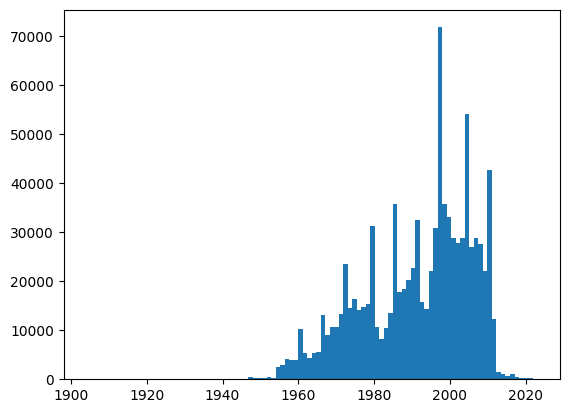

In [63]:
# plt.rcParams['agg.path.chunksize'] = 10000
plt.hist(testdf['ManufactureYear'], bins=100)
plt.show()

In [76]:
print(datax['ManufactureYear'].isna().sum())
print(datax[datax['ManufactureYear'] > 2023].shape[0])
print(datax[datax['ManufactureYear'] < 1901].shape[0])
print(testdf['ManufactureYear'].isna().sum())

datax['ManufactureYear'].describe()

467532
10
519
468061


count    956979.0
mean          NaN
std           NaN
min           2.0
25%        1981.0
50%        1995.0
75%        2003.0
max           inf
Name: ManufactureYear, dtype: float64

### First registration

In [113]:
def parse_dates(df: pd.DataFrame) -> pd.DataFrame:
    df['FirstRegistration'] = pd.to_datetime(
        df['FirstRegistration'], format='%d.%m.%Y', exact=False, errors='coerce')
    df['FirstRegistrationCZ'] = pd.to_datetime(
        df['FirstRegistrationCZ'], format='%d.%m.%Y', exact=False, errors='coerce')

    # return df[(~df['FirstRegistration'].isna()) & (~df['FirstRegistrationCZ'].isna())]
    return df


pipeline.append(parse_dates)


### Make

In [17]:
# def process_make(df: pd.DataFrame) -> pd.DataFrame:
#     df['Make'] = df['Make'].apply(lambda x: str(x).replace('-', ' '))
    
#     return df


# pipeline.append(process_make)


### Model
Group model types such as "OCTAVIA GLX", "OCTAVIA RS" to create bigger groups for analysis.

In [18]:
# Already done in the 'Process missing' step

# def filter_model(df: pd.DataFrame) -> pd.DataFrame:
#     df['Model'] = df['Model'].replace('JINÉ', np.NaN)
    
#     return df


# pipeline.append(filter_model)

In [114]:
def group_models(df: pd.DataFrame) -> pd.DataFrame:
    df['Model'] = df['Model'].astype('str')

    # Strip trailing content in parentheses.
    df['Model'] = df['Model'].apply(lambda x: x.split('(')[0].strip())
    # Remove special characters and duplicate spaces
    df['Model'] = df['Model'].str.replace('[^\w\s]', '', regex=True)
    df['Model'] = df['Model'].str.replace('  ', ' ')
    df['Model'] = df['Model'].str.replace('   ', ' ')

    # Obtain counts of single-word values in the column.
    sws = df[df['Model'].apply(lambda x: len(
        x.split(' '))) == 1]['Model'].to_numpy()
    sws_uniq, sws_cnt = np.unique(sws, return_counts=True)

    # Obtain counts of two-word values in the column.
    tws = df[df['Model'].apply(lambda x: len(
        x.split(' '))) == 2]['Model'].to_numpy()
    tws_uniq, tws_cnt = np.unique(tws, return_counts=True)

    # For each make, group two-word values with <25 occurences whose first-word-only instance has >50 occurences
    # and group similarly seldom appearing multiword (3+ words) values to often appearing two-word values.
    # When a multiword value is seldom, replace it with the first-word-only value when that has enough occurences.
    by_make = df.groupby('Make')
    for make, mdf in by_make:
        # print(f'Make: {make}')
        # Obtain counts of two-word values.
        twv = mdf[mdf['Model'].apply(lambda x: len(
            x.split(' '))) == 2]['Model'].to_numpy()
        twv_uniq, twv_cnt = np.unique(twv, return_counts=True)

        # print(twv_uniq)

        for val, cnt in zip(twv_uniq, twv_cnt):
            if cnt < 25:
                # print(f'Found a candidate: {val}')
                # Find a corresponding single-word value.
                fwp = val.split(' ')[0]
                indices = np.where(sws_uniq == fwp)[0]
                # Check if the count of the single-word value is big enough.
                if indices.size > 0 and sws_cnt[indices[0]] > 50:
                    # Group to the single-word value
                    # print(f'Good 2w candidate: {val} ({cnt}) (group to "{sws_uniq[indices[0]]}" with {sws_cnt[indices[0]]} occrs)')
                    df.loc[(by_make.as_index) & (
                        df['Model'] == val), 'Model'] = fwp
                    continue

        # Obtain counts of two-word values.
        mwv = mdf[mdf['Model'].apply(lambda x: len(
            x.split(' '))) >= 3]['Model'].to_numpy()
        mwv_uniq, mwv_cnt = np.unique(mwv, return_counts=True)

        # print(mwv_uniq)

        for val, cnt in zip(mwv_uniq, mwv_cnt):
            if cnt < 25:
                # print(f'Found a candidate: {val}')
                # Find a corresponding single-word value.
                twp = ' '.join(val.split(' ')[0:2])
                indices = np.where(tws_uniq == twp)[0]
                # Check if the count of the single-word value is big enough.
                if indices.size > 0 and tws_cnt[indices[0]] > 50:
                    # Group to the single-word value
                    # print(f'Good mw candidate: {val} (group to "{tws_uniq[indices[0]]}" with {tws_cnt[indices[0]]} occrs)')
                    df.loc[(by_make.as_index) & (
                        df['Model'] == val), 'Model'] = twp
                    continue
                # Check if the first-word-only variant has enough occurences.
                else:
                    fwp = val.split(' ')[0]
                    indices = np.where(sws_uniq == fwp)[0]
                    # Check if the count of the single-word value is big enough.
                    if indices.size > 0 and sws_cnt[indices[0]] > 50:
                        # Group to the single-word value
                        # print(f'Good mw->1w candidate: {val} ({cnt}) (group to "{sws_uniq[indices[0]]}" with {sws_cnt[indices[0]]} occrs)')
                        df.loc[(by_make.as_index) & (
                            df['Model'] == val), 'Model'] = fwp
                        continue
    
    df['Model'] = df['Model'].astype('category')

    return df


pipeline.append(group_models)


### Motor power
For analysis purposes, extreme values will need to be filtered completely.

In [115]:
def filter_motor_power(df: pd.DataFrame) -> pd.DataFrame:
    df['MotorPower'] = df['MotorPower'].mask(df['MotorPower'] <= 0)
    df['MotorPower'] = df['MotorPower'].replace(np.inf, np.nan)

    # df = df[df['MotorPower'] > 200] = np.nan

    return df[df['MotorPower'] < 250]
    # return df

pipeline.append(filter_motor_power)


In [158]:
# dataxx = filter_make(datax)
# dataxx = filter_model(datax)
datax = filter_motor_power(datax)
datax.sort_values(['MotorPower'], ascending=True).head()

,ManufactureYear,State,FirstRegistration,FirstRegistrationCZ,Type,SecondaryType,Category,Make,ModelSecondary,Model,VIN,MotorPower,MotorVolume,DriveType,Places,Color,WheelbaseSize,Length,Width,Height,OperatingWeight,PermissibleWeight,ConnectingDevice,PermissibleWeightBrakedTrailer,PermissibleWeightUnbrakedTrailer,AxlesCount,TyresN2,TyresN3,TyresN4,RimsN2,RimsN3,RimsN4,MaxSpeed,CityConsumption,AverageConsumption,OutOfCityConsumption,Gearbox,Emissions,CityEmissions,OutOfCityEmissions,InspectionState,IsStandardVIN
2238406,1963.0,ZÁNIK,1988-08-15,1988-08-15,MOTOCYKL,NaN,L3,JAWA,NaN,50-05 PIONÝR,537119,1.099609,50.0,Benzin,2,ČERVENÁ,1210,1860.0,900.0,1245.0,80.0,180.0,.,0.0,0.0,2.0,2.50-16,NaN,NaN,1.50 A X 2,NaN,NaN,45.0,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,OSTATNÍ,False
2923886,1964.0,PROVOZOVANÉ,1964-10-01,1964-10-01,MOTOCYKL,NaN,L3,JAWA,NaN,50-05 PIONÝR,580113,1.099609,50.0,Benzin,2,MODRÁ,1210,1780.0,570.0,930.0,80.0,180.0,NaN,NaN,NaN,2.0,2.50-16,NaN,NaN,1.50 A X 2,NaN,NaN,45.0,2.199219,NaN,NaN,MANUÁLNÍ,NaN,NaN,NaN,PLATNÁ,False
6106073,1960.0,PROVOZOVANÉ,1960-05-11,1960-05-11,MOTOCYKL,NaN,L3,JAWA,NaN,50-550 PIONÝR,231683,1.099609,50.0,BA SMĚS,1,ČERVENÁ,1210,1770.0,600.0,935.0,80.0,180.0,NaN,NaN,NaN,2.0,2.50-16,NaN,NaN,1.50 A X 2,NaN,NaN,45.0,NaN,NaN,NaN,MANUÁLNÍ,NaN,NaN,NaN,NEPLATNÁ,False
15536220,NaN,PROVOZOVANÉ,2019-05-16,2019-05-16,MOTOCYKL,TŘÍKOLKA,L2,NaN,00,NaN,NPPVT5000J0000955,1.099609,NaN,Elektropohon,1,ČERVENÁ,1910,2660.0,1175.0,1345.0,345.0,525.0,NaN,NaN,NaN,2.0,3.50-12 57J,NaN,NaN,2.5X12,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PLATNÁ,True
5463209,2004.0,VYŘAZENO Z PROVOZU,2004-05-05,2004-05-05,MOTOCYKL,MOKIK,LA,KENTOYA,NaN,NaN,LZSXCBL0031013020,1.099609,48.0,Benzin,1,MODRÁ,1060,1660.0,700.0,1010.0,75.0,155.0,.,0.0,0.0,2.0,2.50 X 17 38 L,NaN,NaN,1.20 - 17,NaN,NaN,45.0,0.000000,0.0,0.0,MANUÁLNÍ,NaN,NaN,NaN,OSTATNÍ,True


<AxesSubplot: >

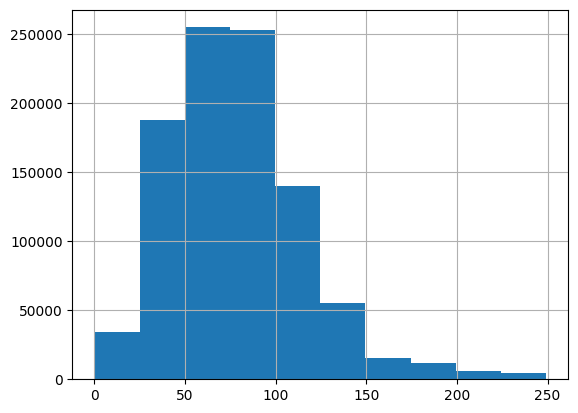

In [86]:
datax[datax['MotorPower'] < 250]['MotorPower'].hist()

### Motor volume
For analysis purposes, extreme values will need to be filtered completely.

In [116]:
def filter_motor_volume(df: pd.DataFrame) -> pd.DataFrame:
    df['MotorVolume'] = df['MotorVolume'].mask(df['MotorVolume'] <= 0)
    df['MotorVolume'] = df['MotorVolume'].replace(np.inf, np.nan)

    df = df[((df['MotorVolume'] <= 3500) & (df['Type'] == 'OSOBNÍ AUTOMOBIL')) | (
        (df['MotorVolume'] < 20000) & (df['Type'] == 'NÁKLADNÍ AUTOMOBIL'))]

    return df


pipeline.append(filter_motor_volume)


In [104]:
dataf[(dataf['MotorVolume'] < 20000) & (dataf['Type'] == 'NÁKLADNÍ AUTOMOBIL')]['MotorVolume'].hist(bins=20)

KeyError: 'MotorVolume'

### Drive type

In [117]:
def parse_drive_type(df: pd.DataFrame) -> pd.DataFrame:
    options = [
        'BA SMĚS',
        'BIO Metan',
        'BIO Nafta',
        'CNG',
        'Benzin',
        # 'Benzín',
        'Elektropohon',
        'Etanol',
        'Etanol 85%',
        'Etanol 95%',
        'LNG',
        'LPG',
        'Nafta',
        'Vodík'
    ]

    def process(x):
        strx = str(x)

        if strx == '' or strx == 'nan':
            return np.nan

        parts = strx.split('+')
        parts = [part.strip() for part in parts]
        
        if 'Benzín' in parts:
            parts.remove('Benzín')
            parts.append('Benzin')

        parts.sort()

        return tuple(parts)

    # Why doesn't `apply` work?
    df['DriveType'] = [process(x) for x in df['DriveType'].to_list()]
    df['DriveType'] = df['DriveType'].astype('category')

    return df

pipeline.append(parse_drive_type)


### Places
Convert things like `2+3`

In [118]:
def parse_places(df: pd.DataFrame) -> pd.DataFrame:
    def process(x):
        total = 0
        try:
            return int(x)
        except:
            strx = str(x)
            if '/' in strx:
                strx = strx.split('/')[0]

            parts = strx.split('+')
            for part in parts:
                try:
                    total += int(part.strip().split(' ')[0].strip('*'))
                except:
                    pass
        if total > 0:
            return total
        else:
            return np.nan    
        
    
    df['Places'] = df['Places'].apply(process)
    df['Places'] = df['Places'].astype('float16')

    return df[(df['Places'] < 200)]
    # return df

pipeline.append(parse_places)


In [34]:
dataf['Places'].unique()

['5', '2', '4', '1', '3', ..., '56+22', '64*', '57+14', '44+43', '175']
Length: 1338
Categories (1337, object): ['0', '1', '10', '18', '19', '2', '2 + 6', '2+2', '2+3', '20', '3', '3+1', '4', '4-5', '46', '48', '5', '54', '6', '60', '62', '7', '72', '8', '8+1', '8+2', '80', '9', '90', '117', '2 + 2', '2+1', '2+6', '21', '45', '70', '73', '75', '94', '1 + 1 NOUZOVÉ', '11', '118', '17', '37', '50', '8/9', '85', '1+1', '14', '15', '2+8', '96', '142', '2+1+6', '2+7', '3+2', '16', '2-6', '2/3', '42', '47', '5-7', '81', '12', '2(3)', '23', '25+1', '3 + 27', '4/5', '5/6', '2 (+1 nouzové)', '22', '3/2', '4 - 5', '5/7', ..., '8;6+1', '56+2', '0Z 100; 1300', '5/5+1', '1/4', '57+25', '3/2/3', '62+30', '6+2 (3+4)', '24+5', '58+28', '53+1+1+27', '59+1+22', '16+3-7', '57/1/28', '61+1+30', '3+4+1', '55+1+32', '48+23', '53+2+27', '48+36', '57+1+28', '75+1', '920', '4 - 8 ', '4 -8 ', '67+1', '3+1 VOZÍČEK', '54+24', '8 ', '50+22', '31761', '64+10', '7+0/5+1', '4-8 ', '46+43', '2 - 4', '8/8', '24+7', '4-

### Dimensions

In [119]:
def filter_dimensions(df: pd.DataFrame) -> pd.DataFrame:
    for col in ['Length', 'Width', 'Height']:
        df[col] = df[col].mask(df[col] <= 0)
        df[col] = df[col].replace(np.inf, np.nan)
        # Filter out complete nonsense
        df[col] = df[col].mask(df[col] > 20000)

    return df

pipeline.append(filter_dimensions)


In [137]:
datax[datax['Length'] < 30000].sort_values('Length', ascending=False)

,ManufactureYear,State,FirstRegistration,FirstRegistrationCZ,Type,SecondaryType,Category,Make,ModelSecondary,Model,VIN,MotorPower,MotorVolume,DriveType,Places,Color,WheelbaseSize,Length,Width,Height,OperatingWeight,PermissibleWeight,ConnectingDevice,PermissibleWeightBrakedTrailer,PermissibleWeightUnbrakedTrailer,AxlesCount,TyresN2,TyresN3,TyresN4,RimsN2,RimsN3,RimsN4,MaxSpeed,CityConsumption,AverageConsumption,OutOfCityConsumption,Gearbox,Emissions,CityEmissions,OutOfCityEmissions,InspectionState,IsStandardVIN
8692328,2004.0,PROVOZOVANÉ,2004-03-31,2004-03-31,OSOBNÍ AUTOMOBIL,NaN,M1,ŠKODA,SCAZQX01,FABIA,TMBPY46Y344053608,47.000000,1198.0,"(Benzin,)",5.0,MODRÁ,2462,24064.0,1646.0,1466.0,1130.0,1570.0,A50-X,800.0,450.0,2.0,165/70 R14 81T,NaN,NaN,5J X 14 H2 ET 35,NaN,NaN,160.0,7.699219,5.101562,6.0,MANUÁLNÍ,144.0,185.0,122.0,PLATNÁ,True
4774984,1999.0,PROVOZOVANÉ,1999-03-05,2004-11-01,MOTOCYKL,NaN,LC,YAMAHA,NaN,NaN,JYA4XR00000002719,29.406250,649.0,"(Benzin,)",2.0,ČERNÁ,1610,23392.0,880.0,1065.0,227.0,407.0,.,0.0,0.0,2.0,100/90 19 57S,NaN,NaN,2.50 X 19,NaN,NaN,140.0,0.000000,0.000000,0.0,MANUÁLNÍ,NaN,NaN,NaN,PLATNÁ,True
7371619,1981.0,PROVOZOVANÉ,1982-08-16,1982-08-16,MOTOCYKL,NaN,L3,JAWA,634-7-02,NaN,5733415,14.703125,343.5,"(BA SMĚS,)",2.0,ČERNÁ,1390,22080.0,710.0,1090.0,175.0,355.0,.,0.0,0.0,2.0,3.25-18,NaN,NaN,"2,15B X 18",NaN,NaN,120.0,0.000000,0.000000,0.0,MANUÁLNÍ,NaN,NaN,NaN,OSTATNÍ,False
14616809,NaN,PROVOZOVANÉ,2017-10-03,2017-10-03,MOTOCYKL,NaN,L3,DUCATI,00,NaN,ZDMKC00AAHB002314,54.000000,803.0,"(Benzin,)",2.0,ČERNÁ,1435,22080.0,810.0,1065.0,192.0,365.0,NaN,NaN,NaN,2.0,110/80 R18 M/C 58H,NaN,NaN,MT 3.00 X 18,NaN,NaN,195.0,NaN,NaN,NaN,MANUÁLNÍ,NaN,NaN,NaN,PLATNÁ,True
16043794,NaN,PROVOZOVANÉ,1980-02-25,2020-05-13,MOTOCYKL,NaN,L3,SUZUKI,NaN,NaN,GS750E013720,46.000000,738.0,"(Benzin,)",2.0,MODRÁ,1490,22032.0,870.0,1170.0,250.0,405.0,NaN,NaN,NaN,2.0,3.25-19,NaN,NaN,19 X MT1.85,NaN,NaN,200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PLATNÁ,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169776,1983.0,PROVOZOVANÉ,1983-12-05,1983-12-05,MOTOCYKL,NaN,L3,NaN,NaN,NaN,009371,NaN,172.0,"(Benzin,)",2.0,ORANŽOVÁ,0,0.0,0.0,0.0,129.0,289.0,.,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,OSTATNÍ,False
1071545,1959.0,ZÁNIK,1959-01-01,1989-03-07,MOTOCYKL,NaN,L3,NaN,NaN,NaN,761168,NaN,172.0,"(Benzin,)",2.0,ČERVENÁ,0,0.0,0.0,0.0,125.0,275.0,.,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,OSTATNÍ,False
4587647,1988.0,PROVOZOVANÉ,1988-06-28,2007-02-23,OSOBNÍ AUTOMOBIL,NaN,M1,NaN,NaN,NaN,JSA0SJ50000158957,NaN,1315.0,"(Benzin,)",4.0,ČERNÁ,0,0.0,0.0,0.0,970.0,1330.0,.,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NEPLATNÁ,True
480587,1970.0,ZÁNIK,1970-01-01,1971-08-19,OSOBNÍ AUTOMOBIL,NaN,M1,NaN,NaN,NaN,2760376,NaN,1046.0,"(Benzin,)",2.0,BÍLÁ,0,0.0,0.0,0.0,875.0,1275.0,.,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,OSTATNÍ,False


<AxesSubplot: >

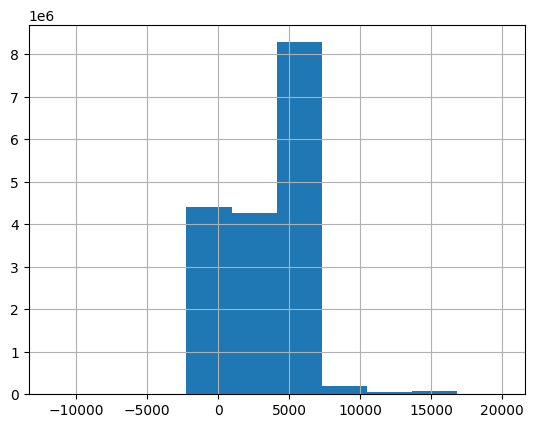

In [40]:
dataf[dataf['Length'] < 20000]['Length'].hist()

### Weight

In [120]:
def filter_weight(df: pd.DataFrame) -> pd.DataFrame:
    for col in ['OperatingWeight',
                'PermissibleWeight',
                'PermissibleWeightBrakedTrailer',
                'PermissibleWeightUnbrakedTrailer']:
        df[col] = df[col].mask(df[col] <= 0)
        df[col] = df[col].replace(np.inf, np.nan)
        # Filter out complete nonsense
        # df[col] = df[col].mask(df[col] > 50000)

    df[((df['OperatingWeight'] <= 3500) & (df['PermissibleWeight'] <= 3500) & (df['Type'] == 'OSOBNÍ AUTOMOBIL'))
        |((df['OperatingWeight'] <= 20000) & (df['PermissibleWeight'] <= 50000) & (df['Type'] == 'NÁKLADNÍ AUTOMOBIL'))
        |((df['OperatingWeight'] <= 2000) & (df['PermissibleWeight'] <= 35000) & (df['Type'] == 'AUTOBUS'))]

    return df


pipeline.append(filter_weight)


<AxesSubplot: >

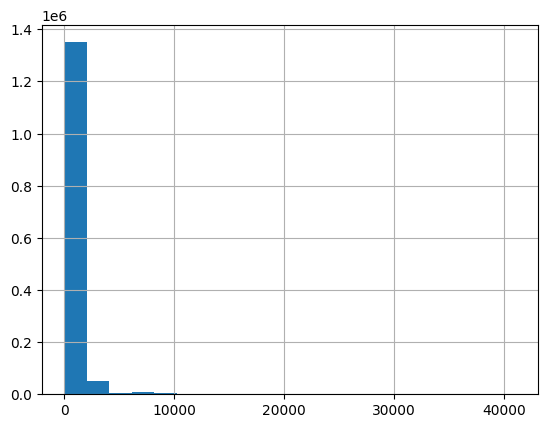

In [164]:
datax[(datax['OperatingWeight'] > 0) & (datax['OperatingWeight'] < np.inf)]['OperatingWeight'].hist(bins=20)

In [169]:
datax[(datax['OperatingWeight'] > 30000)]

,ManufactureYear,State,FirstRegistration,FirstRegistrationCZ,Type,SecondaryType,Category,Make,ModelSecondary,Model,VIN,MotorPower,MotorVolume,DriveType,Places,Color,WheelbaseSize,Length,Width,Height,OperatingWeight,PermissibleWeight,ConnectingDevice,PermissibleWeightBrakedTrailer,PermissibleWeightUnbrakedTrailer,AxlesCount,TyresN2,TyresN3,TyresN4,RimsN2,RimsN3,RimsN4,MaxSpeed,CityConsumption,AverageConsumption,OutOfCityConsumption,Gearbox,Emissions,CityEmissions,OutOfCityEmissions,InspectionState,IsStandardVIN
14717418,NaN,VYŘAZENO Z PROVOZU,2001-05-03,2017-12-06,OSOBNÍ AUTOMOBIL,KOMBI,M1,ŠKODA,SEALHX01,OCTAVIA,TMBHG21U312478012,66.0,1896.0,BIO Nafta,4,ŠEDÁ,2518,4512.0,1731.0,1457.0,inf,1905.0,TŘÍDA A-50X,1300.0,500.0,2.0,195/65 R 15 91 T,NaN,NaN,6J X 15 ET 38,NaN,NaN,176.0,8.898438,4.800781,6.300781,AUTOMATICKÁ,NaN,NaN,NaN,OSTATNÍ,True
12123436,2008.0,PROVOZOVANÉ,2008-10-09,2008-10-09,OSOBNÍ AUTOMOBIL,NaN,M1,NaN,NaN,NaN,MALAM51CP9M169081,NaN,1248.0,Benzin,5,ŠEDÁ,NaN,NaN,NaN,NaN,inf,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PLATNÁ,True
14302876,NaN,PROVOZOVANÉ,2017-03-27,2017-03-27,NÁKLADNÍ AUTOMOBIL,SKŘÍŇOVÝ,N1,PEUGEOT,D3MFC,BOXER,VF3YD3MFC12D47397,120.0,1997.0,Nafta,3,BÍLÁ,4035,6364.0,2050.0,2522.0,inf,3500.0,NaN,3000.0,750.0,2.0,215/75R16C 116/114R,NaN,NaN,6.00J16 (E=68),NaN,NaN,156.0,6.898438,6.101562,6.398438,MANUÁLNÍ,168.0,181.0,160.0,PLATNÁ,True
15054703,NaN,PROVOZOVANÉ,2018-06-29,2018-06-29,NÁKLADNÍ AUTOMOBIL,BA,N3,MERCEDES-BENZ,UPBM2RN43BXC280,NaN,WDB96403010237727,315.0,10680.0,Nafta,2,BÍLÁ,1 750 + 4 000 + 1 350,11904.0,2550.0,3900.0,31504.0,36992.0,NaN,NaN,NaN,4.0,"315/80 R 22,5 154/--- G","315/80 R 22,5 ---/149 G [2]","315/80 R 22,5 ---/149 G [2]",22.5x9.00,22.5x9.00,22.5x9.00,90.0,NaN,NaN,NaN,AUTOMATICKÁ,NaN,NaN,NaN,PLATNÁ,True
17024769,NaN,PROVOZOVANÉ,2022-03-21,2022-03-21,NÁKLADNÍ AUTOMOBIL,SPECIÁLNÍ,N3,NaN,1,NaN,W09D22432N1A65568,581.0,16152.0,Nafta,1,ZELENÁ,2070+4950+1050,10336.0,2550.0,3950.0,30496.0,34912.0,NaN,16000.0,750.0,4.0,J17.5x6.75 ET0,20Bx42 ET110,J17.5x6.75 ET0,235/75R17.5 143J,645/65R42 170G,235/75R17.5 143J,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PLATNÁ,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11842070,2006.0,VÝVOZ,2006-07-04,2006-07-04,NÁKLADNÍ AUTOMOBIL,NaN,N3,NaN,NaN,NaN,TNT290S846K039742,NaN,12664.0,Nafta,2,ČERVENÁ,NaN,NaN,NaN,NaN,32032.0,0.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OSTATNÍ,True
12062296,2005.0,VÝVOZ,2005-06-02,2005-06-02,NÁKLADNÍ AUTOMOBIL,NaN,N3,NaN,NaN,NaN,TNU290R845K038549,NaN,12664.0,Nafta,2,ČERVENÁ,NaN,NaN,NaN,NaN,32032.0,0.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OSTATNÍ,True
12546964,NaN,PROVOZOVANÉ,2013-07-08,2013-07-08,NÁKLADNÍ AUTOMOBIL,NOSIČ NÁSTAVEB,N3,MERCEDES-BENZ,UKAV41AXL,NaN,WDB9320031L764038,320.0,11944.0,Nafta,2,MODRÁ,3900,6488.0,2490.0,3520.0,inf,19008.0,TŘÍDA C 50 X,28496.0,750.0,2.0,"315/80 R 22,5 152/--- G",NaN,NaN,9.00X22.5,NaN,NaN,90.0,0.000000,0.000000,0.000000,MANUÁLNÍ,NaN,NaN,NaN,PLATNÁ,True
11815150,2006.0,PROVOZOVANÉ,2006-06-20,2009-04-15,OSOBNÍ AUTOMOBIL,NaN,M1,NaN,NaN,NaN,WP0ZZZ98Z6U704760,NaN,2688.0,Benzin,0,ŠEDÁ,NaN,NaN,NaN,NaN,inf,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PLATNÁ,True


In [89]:
dataf[dataf['Type'] == 'NÁKLADNÍ AUTOMOBIL']['PermissibleWeight'].isna().sum()

36

'NÁKLADNÍ AUTOMOBIL: OperatingWeight'

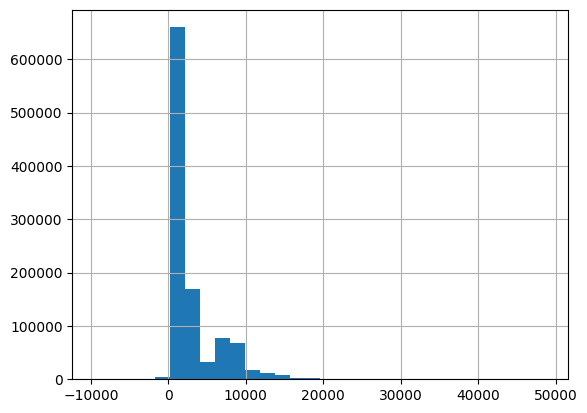

'NÁKLADNÍ AUTOMOBIL: PermissibleWeight'

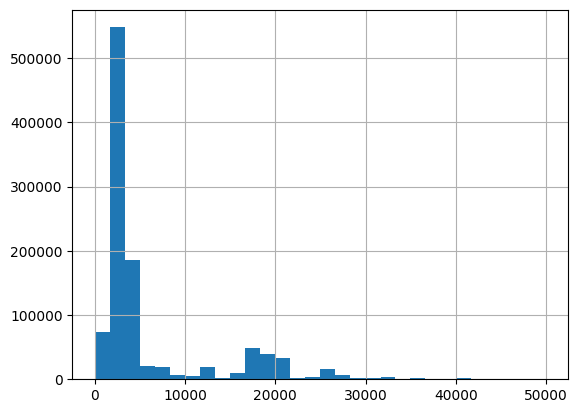

'AUTOBUS: OperatingWeight'

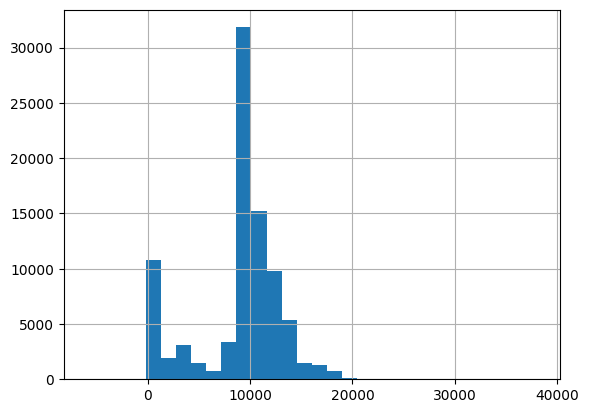

'AUTOBUS: PermissibleWeight'

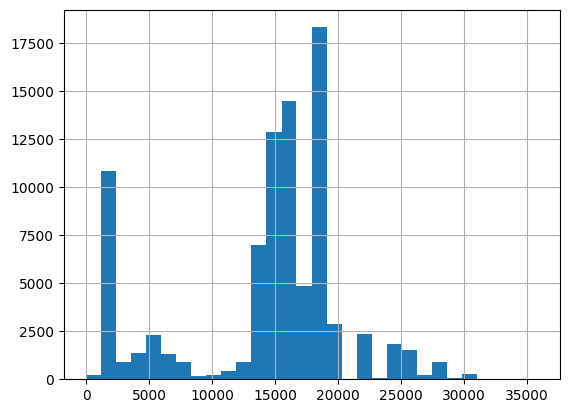

In [91]:
for vt in ['NÁKLADNÍ AUTOMOBIL', 'AUTOBUS']:
    for wt in ['OperatingWeight', 'PermissibleWeight']:
        display(f'{vt}: {wt}')
        dataf[(dataf[wt] < 50000) & (dataf['Type'] == vt)][wt].hist(bins=30)
        plt.show()

### Axles count

In [121]:
def filter_axles_count(df: pd.DataFrame) -> pd.DataFrame:
    df['AxlesCount'] = df['AxlesCount'].mask(df['AxlesCount'] <= 0)
    df['AxlesCount'] = df['AxlesCount'].replace(np.inf, np.nan)
    # Filter out complete nonsense
    df['AxlesCount'] = df['AxlesCount'].mask(df['AxlesCount'] > 20)

    return df

pipeline.append(filter_axles_count)


### Maximum speed

In [122]:
def filter_max_speed(df: pd.DataFrame) -> pd.DataFrame:
    df['MaxSpeed'] = df['MaxSpeed'].mask(df['MaxSpeed'] <= 0)
    df['MaxSpeed'] = df['MaxSpeed'].replace(np.inf, np.nan)
    # Filter out complete nonsense
    df['MaxSpeed'] = df['MaxSpeed'].mask(df['MaxSpeed'] > 1000)

    return df

pipeline.append(filter_max_speed)


### Consumption

In [123]:
def filter_consumption(df: pd.DataFrame) -> pd.DataFrame:
    for col in ['AverageConsumption',
                'CityConsumption',
                'OutOfCityConsumption']:
        df[col] = df[col].mask(df[col] <= 0)
        df[col] = df[col].replace(np.inf, np.nan)
        # Filter out complete nonsense
        df[col] = df[col].mask(df[col] > 100)

    return df


pipeline.append(filter_consumption)


### Emissions

In [124]:
def filter_emissions(df: pd.DataFrame) -> pd.DataFrame:
    for col in ['Emissions',
                'CityEmissions',
                'OutOfCityEmissions',]:
        df[col] = df[col].mask(df[col] <= 0)
        df[col] = df[col].replace(np.inf, np.nan)
        # Filter out complete nonsense
        df[col] = df[col].mask(df[col] > 500)

    return df


pipeline.append(filter_emissions)


<AxesSubplot: >

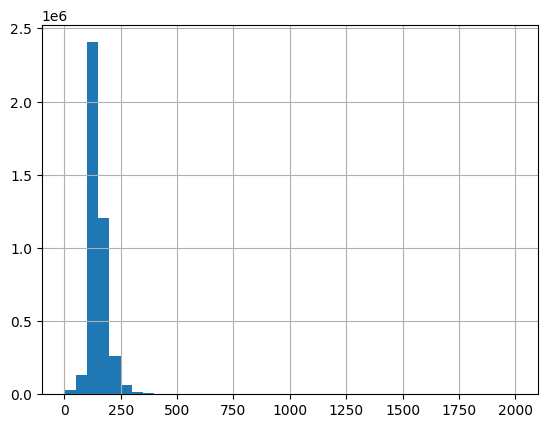

In [53]:
dataf[dataf['Emissions'] < np.inf]['Emissions'].hist(bins=40)

### (Temporary) Remove records with null values and filter dates.
This is only removed for preprocessing.

- Fields such as `ManufactureYear`, `Category` must be non-null
- `IsStandardVIN` must be true


In [131]:
def filter_incomplete(df: pd.DataFrame):
    return df.dropna(subset=[
        'ManufactureYear',
        'FirstRegistration',
        'FirstRegistrationCZ',
        'Category',
        'Make',
        'Model',
        'MotorPower',
        'MotorVolume',
    ])


pipeline.append(filter_incomplete)


## Run the pipeline

In [132]:
pipeline

[<function __main__.rename_cols(df: pandas.core.frame.DataFrame)>,
 <function __main__.process_missing(df: pandas.core.frame.DataFrame)>,
 <function __main__.filter_vehicle_types(df: pandas.core.frame.DataFrame)>,
 <function __main__.filter_duplicates(df: pandas.core.frame.DataFrame)>,
 <function __main__.flag_vins(df: pandas.core.frame.DataFrame)>,
 <function __main__.parse_date_of_manufacture(df: pandas.core.frame.DataFrame)>,
 <function __main__.parse_dates(df: pandas.core.frame.DataFrame) -> pandas.core.frame.DataFrame>,
 <function __main__.group_models(df: pandas.core.frame.DataFrame) -> pandas.core.frame.DataFrame>,
 <function __main__.filter_motor_power(df: pandas.core.frame.DataFrame) -> pandas.core.frame.DataFrame>,
 <function __main__.filter_motor_volume(df: pandas.core.frame.DataFrame) -> pandas.core.frame.DataFrame>,
 <function __main__.parse_drive_type(df: pandas.core.frame.DataFrame) -> pandas.core.frame.DataFrame>,
 <function __main__.parse_places(df: pandas.core.frame.D

In [26]:
pipeline = [rename_cols]

In [126]:
# Run the pipeline
def run(df: pd.DataFrame):
    for func in pipeline:
        print(func.__name__)
        df = func(df)
    return df


In [134]:
dataf = run(dataf)

rename_cols
process_missing
filter_vehicle_types
filter_duplicates
flag_vins
parse_date_of_manufacture
parse_dates
group_models
filter_motor_power
filter_motor_volume
parse_drive_type
parse_places
filter_dimensions
filter_weight
filter_axles_count
filter_max_speed
filter_consumption
filter_emissions
filter_incomplete


In [137]:
dataf['DriveType'] = dataf['DriveType'].apply(lambda x: '+'.join(x))
dataf['DriveType']

687             Benzin
786             Benzin
1695            Benzin
1940             Nafta
1943            Benzin
               ...    
17479552        Benzin
17481255        Benzin
17485862    Benzin+LPG
17488444        Benzin
17489237         Nafta
Name: DriveType, Length: 4334574, dtype: category
Categories (27, object): ['BA SMĚS', 'BIO Metan', 'BIO Nafta', 'Benzin', 'Benzin+CNG', 'Benzin+CNG+Etanol', 'Benzin+CNG+LPG', 'Benzin+Elektropohon', 'Benzin+Elektropohon+LPG', 'Benzin+Etanol 85%', 'Benzin+Etanol 85%+LPG', 'Benzin+Etanol 95%', 'Benzin+LNG', 'Benzin+LPG', 'Benzin+Nafta', 'CNG', 'CNG+Nafta', 'Elektropohon', 'Elektropohon+Nafta', 'Etanol 85%', 'Etanol 95%', 'LNG', 'LNG+Nafta', 'LPG', 'LPG+Nafta', 'Nafta', 'Vodík']

In [138]:
# dataf = dataf.drop(['TyresN1', 'TyresN2', 'TyresN3', 'TyresN4', 'RimsN1', 'RimsN2', 'RimsN3', 'RimsN4'], axis=1)

dataf.to_csv('./data/nosync/registr_silnicnich_vozidel_2023-02-24.analysis-cleaned-2023-05-14.csv')

In [144]:
datax = data.copy(deep=True)

In [32]:
datax[['SecondaryType', 'BodyType']]

,SecondaryType,BodyType
9335655,KOMBI,KOMBI
8179280,KOMBI,KOMBI
6777816,HATCHBACK,5 DVÉŘOVÁ
6431340,NaN,NaN
11650426,NaN,SEDAN
...,...,...
17218795,HATCHBACK,NaN
11733288,SKŘÍŇOVÝ,NaN
10114497,NaN,NaN
4240902,NaN,NaN


In [ ]:
def x(df: pd.DataFrame) -> pd.DataFrame:
    

    return df

pipeline.append(x)


In [199]:
data = None
datax = None
dataxx = None

<AxesSubplot: xlabel='Make'>

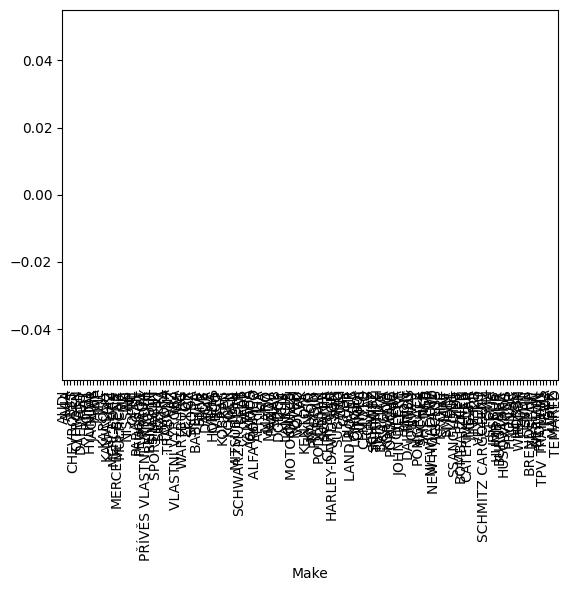

In [16]:
dataf[dataf['Make'].str.contains('SCHIMTZ', na=False)].groupby(['Make']).size().plot(kind = "bar")